<a href="https://colab.research.google.com/github/gdmst/Topic_Modeling_Sexbot/blob/main/Topic_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('Sexbot_news.csv', encoding='utf-8')

In [ ]:
df.head()

,ID,title,media,date,datetime,desc,link,img
0,0,10 Best Sex Bots For Hot Content & AI Sex Chats,Greenbot,1 month ago,2024-08-16 23:19:35.872994,NaN,https://www.greenbot.com/sex-bots/&ved=2ahUKEw...,NaN
1,1,Meet M3GAN’s Sexbot Cousin in Blumhouse’s Soul...,Gizmodo Australia,2 months ago,2024-07-16 23:19:35.879060,The film is set to be helmed by Kate Dolan (Yo...,https://gizmodo.com.au/2024/06/meet-m3gans-sex...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
2,2,China’s next-gen sexbots powered by AI about t...,South China Morning Post,2 months ago,2024-07-16 23:19:35.883434,Chinese scientists and engineers are applying ...,https://www.scmp.com/news/china/science/articl...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
3,3,Gabfest Reads: When a Sex Robot Catches Feelin...,YouTube,3 months ago,2024-06-16 23:19:35.887582,David Plotz talks with author Sierra Greer abo...,https://www.youtube.com/watch%3Fv%3D2dyDGDhWGL...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
4,4,Dunedin rest home manager censured for 'sex ro...,Otago Daily Times,3 months ago,2024-06-16 23:19:35.891695,Dunedin rest home manager censured for 'sex ro...,https://www.odt.co.nz/news/dunedin/dunedin-res...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."


In [ ]:
import pandas as pd
df = pd.read_csv('Sexbot_articles.csv', encoding='utf-8')

In [ ]:
df.head()

,ID,Date,Media,Title,Article,Summary
0,0,3 months ago,Otago Daily Times,Dunedin rest home manager censured for 'sex ro...,The two student nurses were removed from the r...,The two student nurses were removed from the r...
1,1,5 months ago,GlobeNewswire,"Mocking, Biting Satire About Trump and an AI S...","Charleston, SC, April 09, 2024 (GLOBE NEWSWIRE...","Charleston, SC, April 09, 2024 (GLOBE NEWSWIRE..."
2,2,6 months ago,New Scientist,Annie Bot review: A sharp take on a sex robot ...,"In a smart, compassionate novel, Sierra Greer ...","In a smart, compassionate novel, Sierra Greer ..."
3,3,0 months ago,The US Sun,Inside world’s first cyber sex brothel where c...,DIRTY WEEKEND Inside world’s first cyber sex b...,DIRTY WEEKEND Inside world’s first cyber sex b...
4,4,0 months ago,The US Sun,Inside world’s first cyber sex brothel where c...,DIRTY WEEKEND Inside world’s first cyber sex b...,DIRTY WEEKEND Inside world’s first cyber sex b...


In [ ]:

media_counts = df['Media'].value_counts()

# Proceed to create the plot as shown above
media_counts

,count
Media,
The Sun,10
The Irish Sun,9
The US Sun,7
ABC13 Houston,2
Business Insider,2
Futurism,2
ABC7 San Francisco,2
The Next Web,1
ABC7 New York,1


# Data Preprocessing

In [ ]:
dataset = df['Article']

dataset.head()

,Article
0,The two student nurses were removed from the r...
1,"Charleston, SC, April 09, 2024 (GLOBE NEWSWIRE..."
2,"In a smart, compassionate novel, Sierra Greer ..."
3,DIRTY WEEKEND Inside world’s first cyber sex b...
4,DIRTY WEEKEND Inside world’s first cyber sex b...


In [ ]:
dataset.size

56

## Remove Duplicates

In [ ]:
dataset_nodup = dataset.drop_duplicates()
dataset_nodup.head()

,Article
0,The two student nurses were removed from the r...
1,"Charleston, SC, April 09, 2024 (GLOBE NEWSWIRE..."
2,"In a smart, compassionate novel, Sierra Greer ..."
3,DIRTY WEEKEND Inside world’s first cyber sex b...
5,Smartphone security has become very important ...


In [ ]:
dataset_nodup.size

49

## Remove emoji

In [ ]:
import re

# Function to remove emojis from a string
def remove_emojis(text):
    # Define a regex pattern for emojis
    emoji_pattern = re.compile("[\U0001F600-\U0001F64F"  # emoticons
                                 "\U0001F300-\U0001F5FF"  # symbols & pictographs
                                 "\U0001F680-\U0001F6FF"  # transport & map symbols
                                 "\U0001F700-\U0001F77F"  # alchemical symbols
                                 "\U0001F780-\U0001F7FF"  # geometic shapes
                                 "\U0001F800-\U0001F8FF"  # supplemental arrows
                                 "\U0001F900-\U0001F9FF"  # supplemental symbols
                                 "\U0001FA00-\U0001FAFF"  # chess symbols
                                 "\U00002702-\U000027B0"  # miscellaneous symbols
                                 "\U000024C2-\U0001F251"  # enclosed characters
                                 "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

# Remove emojis from each item in the list
cleaned_list = [remove_emojis(item) for item in dataset_nodup]

# Display the cleaned list
print("List after removing emojis:")
print(cleaned_list)


List after removing emojis:
['The two student nurses were removed from the rest home after one of them complained to their polytechnic about Sobrevilla\'s behaviour. File photo: Getty\n\n"I’m not being creepy or a paedo," Michael Sobrevilla insisted to a student nurse he later asked to provide him with a picture of her face so he could use it as reference for a sex robot.\n\nThe rest home manager also told one of two students they were flirting with him, he wanted to wax her arms and that when he was older, he would like a prostitute to entertain him.\n\n"Will you be my pimp?" Sobrevilla asked one of those students after that conversation, to which she replied, "No."\n\nSobrevilla also told one of the students, who were stationed at the rest home for four weeks as part of their studies through Otago Polytechnic, he liked blondes and would like to take her home\n\nAfter this last comment, one of Sobrevilla’s colleagues told him he sounded like a "sleazy old man". One of the students com

## Remove Symbols and Punctuation

In [ ]:
import string

# Function to remove punctuation and symbols
def remove_punctuation(text):
    # Create a translation table that maps punctuation to None
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

# Remove punctuation and symbols from each item in the list
cleaned_list = [remove_punctuation(item) for item in cleaned_list]

# Display the cleaned list
print("List after removing punctuation and symbols:")
print(cleaned_list)


List after removing punctuation and symbols:
['The two student nurses were removed from the rest home after one of them complained to their polytechnic about Sobrevillas behaviour File photo Getty\n\nI’m not being creepy or a paedo Michael Sobrevilla insisted to a student nurse he later asked to provide him with a picture of her face so he could use it as reference for a sex robot\n\nThe rest home manager also told one of two students they were flirting with him he wanted to wax her arms and that when he was older he would like a prostitute to entertain him\n\nWill you be my pimp Sobrevilla asked one of those students after that conversation to which she replied No\n\nSobrevilla also told one of the students who were stationed at the rest home for four weeks as part of their studies through Otago Polytechnic he liked blondes and would like to take her home\n\nAfter this last comment one of Sobrevilla’s colleagues told him he sounded like a sleazy old man One of the students complained 

## Remove \n

In [ ]:
# Replace newline characters with spaces
cleaned_list = [item.replace('\n', ' ') for item in cleaned_list]

# Display the cleaned list
print("List after replacing newlines with spaces:")
print(cleaned_list)

List after replacing newlines with spaces:
['The two student nurses were removed from the rest home after one of them complained to their polytechnic about Sobrevillas behaviour File photo Getty  I’m not being creepy or a paedo Michael Sobrevilla insisted to a student nurse he later asked to provide him with a picture of her face so he could use it as reference for a sex robot  The rest home manager also told one of two students they were flirting with him he wanted to wax her arms and that when he was older he would like a prostitute to entertain him  Will you be my pimp Sobrevilla asked one of those students after that conversation to which she replied No  Sobrevilla also told one of the students who were stationed at the rest home for four weeks as part of their studies through Otago Polytechnic he liked blondes and would like to take her home  After this last comment one of Sobrevilla’s colleagues told him he sounded like a sleazy old man One of the students complained to the polyt

## Remove Stopwords and Lemmatization


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

# data_array = dataset_nodup.to_numpy()

# data_array.shape

def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

dataset_clean = [clean(doc).split() for doc in cleaned_list]

In [ ]:
type(dataset_clean)

list

In [ ]:
print(dataset_clean[10:])

[['like', 'bot', 'like', 'bot', 'creepy', '‘sex', 'robot', 'swap', 'shop’', 'online', 'doll', 'lover', 'trade', 'used', 'figurine', 'used', 'sex', 'doll', 'sold', 'online', 'fraction', 'original', 'prize', 'people', 'snapping', 'used', 'doll', 'come', 'name', 'even', 'human', 'hair', '2', 'lot', 'second', 'hand', 'doll', 'already', 'sold', 'credit', 'galmato', '2', 'site', 'also', 'selling', 'sex', 'doll', 'head', 'credit', 'galmato', 'website', 'called', 'galmato', 'specialises', 'selling', 'preloved', 'sex', 'doll', 'also', 'fix', 'sex', 'doll', 'offer', 'spa', 'day', 'experience', 'website', 'state', 'won’t', 'get', 'mud', 'bath', 'cucumber', 'eye', 'every', 'minorandmajor', 'injury', 'repaired', 'nick', 'poke', 'limb', 'break', 'makeup', 'nail', 'body', 'coloration', 'restored', 'joint', 'tightened', 'she’ll', 'treated', 'like', 'princess', 'come', 'home', 'freshly', 'powdered', 'rejuvenated', 'ready', 'make', 'feel', 'like', 'day', 'arrived', 'first', 'time', 'site', 'certified', 

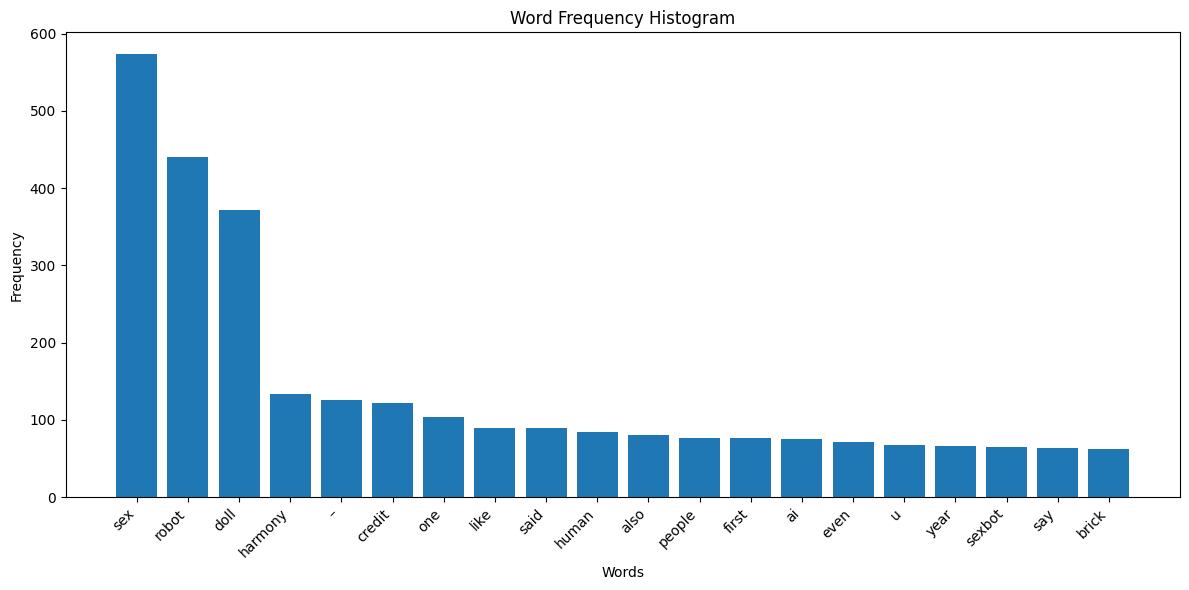

In [ ]:
# prompt: create histogram of word frequency

from collections import Counter
import matplotlib.pyplot as plt

# Flatten the list of lists into a single list of words
all_words = [word for sublist in dataset_clean for word in sublist]

# Count word frequencies
word_counts = Counter(all_words)

# Get the most common words and their frequencies
most_common_words = word_counts.most_common(20)  # Adjust the number as needed

# Extract words and frequencies for plotting
words, frequencies = zip(*most_common_words)

# Create the histogram
plt.figure(figsize=(12, 6))
plt.bar(words, frequencies)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Word Frequency Histogram')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
# prompt: remove "-" from dataset_clean

dataset_clean_no_hyphen = [[word for word in sublist if word != '-'] for sublist in dataset_clean]


# Preparing Document-Term Matrix

In [ ]:
# Importing Gensim
import gensim
from gensim import corpora

# Creating the term dictionary of our courpus, where every unique term is assigned an index.
dictionary = corpora.Dictionary(dataset_clean)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in dataset_clean]


In [ ]:
doc_term_matrix

# Modeling

In [ ]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=5, id2word = dictionary, passes=50)

In [ ]:
print(ldamodel.print_topics(num_topics=3, num_words=3))

[(0, '0.027*"robot" + 0.027*"sex" + 0.013*"doll"'), (1, '0.033*"sex" + 0.024*"doll" + 0.023*"robot"'), (2, '0.006*"sex" + 0.006*"like" + 0.005*"autoblow"')]


In [ ]:
ldamodel.print_topics(num_topics=5, num_words=5)

[(0,
  '0.012*"brick" + 0.012*"said" + 0.010*"sex" + 0.010*"doll" + 0.008*"robot"'),
 (1, '0.025*"doll" + 0.019*"sex" + 0.008*"like" + 0.006*"year" + 0.005*"one"'),
 (2,
  '0.021*"sex" + 0.020*"robot" + 0.013*"doll" + 0.008*"human" + 0.005*"ai"'),
 (3,
  '0.035*"sex" + 0.028*"robot" + 0.019*"doll" + 0.011*"harmony" + 0.009*"–"'),
 (4,
  '0.015*"sex" + 0.014*"robot" + 0.011*"unicole" + 0.008*"doll" + 0.005*"credit"')]

# Adjust and Improve

- Add more data to dataset
- remove one character words,
- remove hyphen